# Given a BED file of regions, count the number of times a T occurs within that region.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pybedtools
import numpy as np
import pandas as pd
import os

In [2]:
def get_seq_from_interval(interval):
    """ returns the fasta sequence at a given interval. fasta might need to be indexed. """
    return pybedtools.getfasta(interval)

def get_pos_and_strand_from_interval(interval):
    """ stringifies the BedTools Interval object. Also return strand."""
    return '{}:{}-{}'.format(
        interval.chrom,
        interval.start,
        interval.end,
    ), interval.strand

translation_dict_dna={'A':'T','C':'G','T':'A','G':'C','N':'N'}

def comp(seq,dictionary=translation_dict_dna):
    """ Standard complement sequence function.
    
        Returns: the complement sequence
    """
    seq=seq.upper()
    comp=[None]*len(seq)
    for i in range(0,len(seq)):
        comp[i]=dictionary[seq[i]]
    return ''.join(comp)


def revcomp(seq,dictionary=translation_dict_dna):
    """ Standard reverse complement function.
    
        Returns: the reverse complement
    """
    seq=seq.upper()
    comp=[None]*len(seq)
    for i in range(0,len(seq)):
        comp[len(seq)-1-i]=dictionary[seq[i]]
    return ''.join(comp)

def return_is_t_positions(seq):
    """ returns the length of the sequence with T counts at each position. """
    t_array = [0] * len(seq)
    pos = 0
    for nt in seq:
        if nt.upper() == 'T':
            t_array[pos] += 1
        pos += 1
    return t_array

hg19 = '/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa'

def return_dataframe_with_t_positions(fn, genome=hg19):
    """ iterates over each region in BED file and returns counts of T as a dataframe. """
    t_regions = []
    indices = []
    fasta = pybedtools.example_filename(genome)
    bedtool = pybedtools.BedTool(fn)
    for interval in bedtool:
        position, strand = get_pos_and_strand_from_interval(interval)
        sequence = pybedtools.BedTool.seq(loc=position, fasta=fasta)
        if strand == '-':
            sequence = revcomp(sequence)
        elif strand != '+':
            return 1
        t_regions.append(return_is_t_positions(sequence))
        indices.append("{}:{}".format(position, strand))
        
    df = pd.DataFrame(t_regions, index=indices)
    return df

In [3]:
df = return_dataframe_with_t_positions('/projects/ps-yeolab3/shsathe/encode_rmats_analyze_motifs/flanking_500bp/SUCLG1three_prime_500bp_flanking_regions.bed')
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
chr1:24021281-24021781:+,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
chr1:207941168-207941668:+,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,1
chr6:142704980-142705480:+,0,0,1,0,0,0,0,0,0,1,...,0,1,1,1,1,1,0,1,1,1
chr9:139703881-139704381:+,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
chr19:45417990-45418490:+,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
chr6:145148522-145149022:+,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
chr2:63215173-63215673:+,0,0,1,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,1
chr18:72164961-72165461:+,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
chr17:55754420-55754920:+,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
chr9:131355321-131355821:+,1,0,1,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,1,1,0


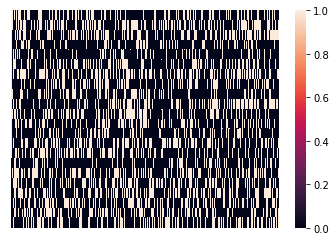

In [4]:
sns.heatmap(df, xticklabels=False, yticklabels=False)